# Final Report

## Introduction

We were tasked with finding the "best" neighborhood in Pittsburgh using data from the WPRDC. Frankly, we browsed the website individually for data sets. After we each found one, they just happened to come together perfectly. We came across many different data sets - from air quality to green areas, but we ultimately decided against those data sets.

## The Metric

We used two data sets: 'public safety' and 'fire incidents'. We combined these into the general metric of "safety". In general, the data sets described the amount and type of crime and fire-related incidents in each neighborhood, respectively.

## The Best Neighborhood

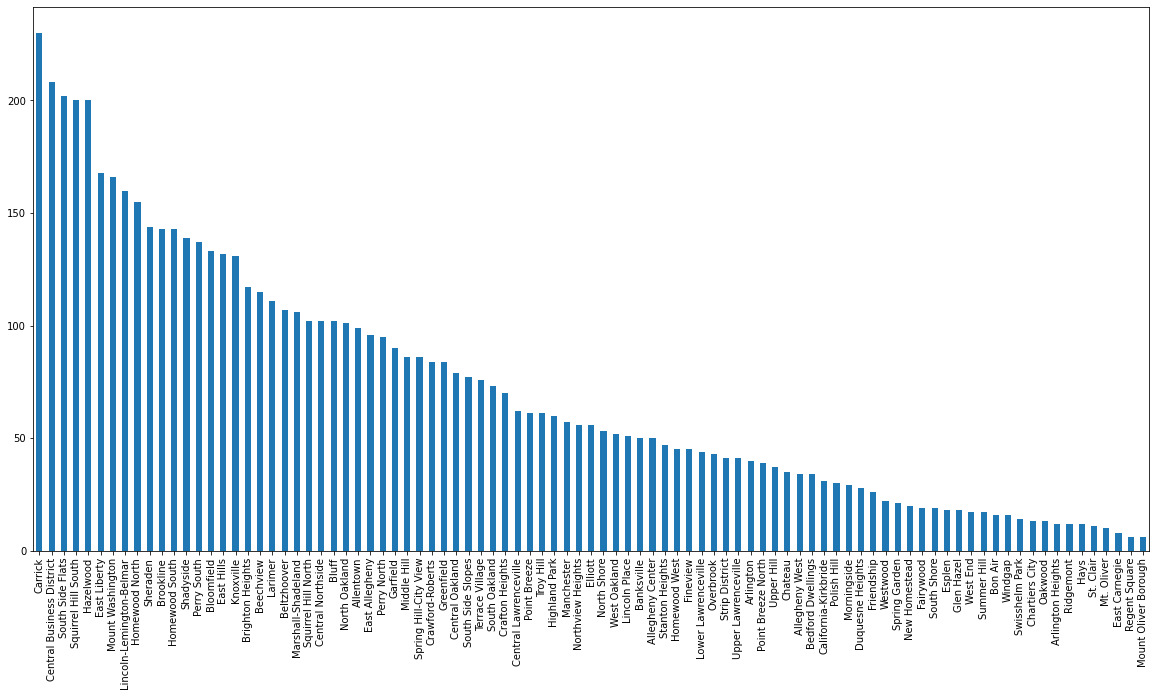

In [3]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

incidents = pd.read_csv("fireIncidents.csv")
incidents=incidents.dropna(subset=['neighborhood']).reset_index(drop='true') #drop incidents that are not associated with a neighborhood
rel_incidents=incidents[['type_description','neighborhood']]
count_incidents=rel_incidents['neighborhood'].value_counts()
plt.figure(figsize=(20,10)) # extra room for all the neighborhoods
count_incidents.plot(kind='bar')

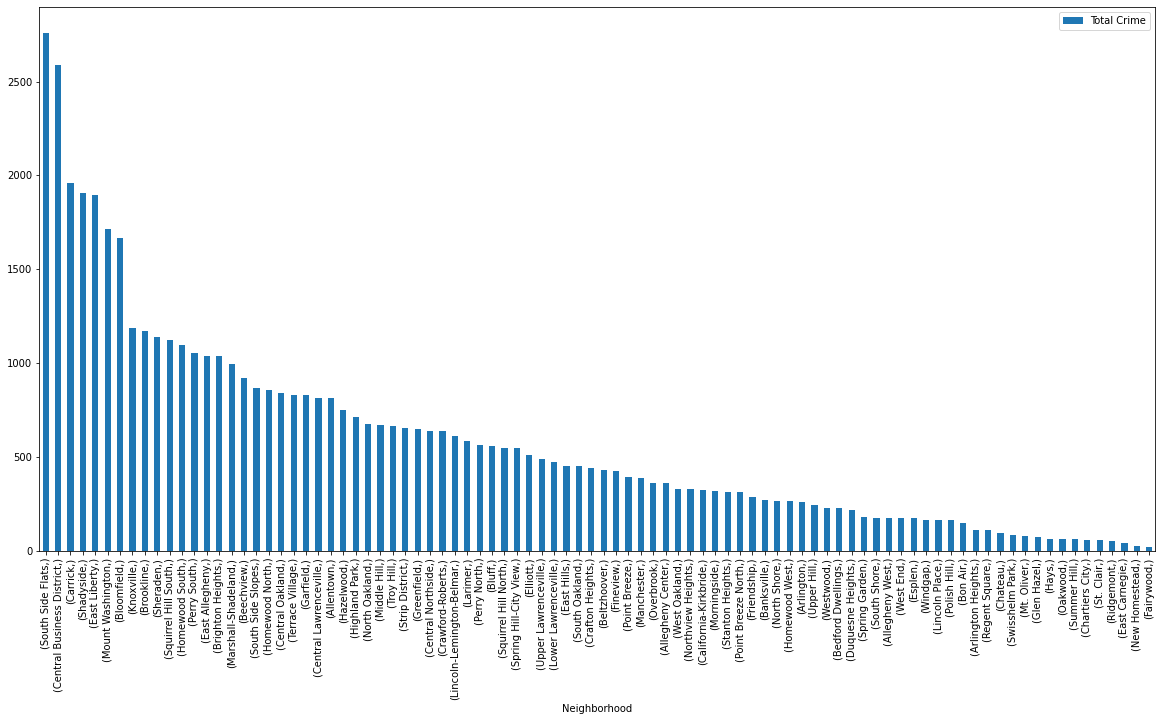

In [4]:
crimes = pd.read_csv("public-safety.csv")

del crimes["Sector #"]
del crimes["Population (2010)"]
del crimes["Part 1 Crime per 100 Persons (2010)"]
del crimes["Part 2 Crime per 100 Persons (2010)"]

#major crimes are weighted twice as heavily
crimes["#Part 1 (Major Crime) Reports (2010)"]=crimes["#Part 1 (Major Crime) Reports (2010)"]*2
#Non major crime reports stay as is (redundant to write here)
crimes["#Part 2 Reports (2010)"]=crimes["#Part 2 Reports (2010)"]*1
#other police reports are only weighted 0.6 as much
crimes["#Other Police Reports (2010)"]=crimes["#Other Police Reports (2010)"]*0.6
#murder reports are weighted as 3 times as important
crimes["#Murder (2010)"]=crimes["#Murder (2010)"]*3
#rape is similarly weighted 3 times as important
crimes["#Rape (2010)"]=crimes["#Rape (2010)"]*3
#robbery is moved down to 0.6 times as important
crimes["#Robbery (2010)"]=crimes["#Robbery (2010)"]*0.6
#Agr. Assult will be weighted by 1.5
crimes["#Agr. Assault (2010)"]=crimes["#Agr. Assault (2010)"]*1.5
#Burglary will remain the same at 1
crimes["#Burglary (2010)"]=crimes["#Burglary (2010)"]*1
#Auto theft will be slightly higher than burglary at 1.5
crimes["#Auto Theft (2010)"]=crimes["#Auto Theft (2010)"]*1.5
#Drug violations will be weighted at only 0.5
crimes["#Drug Violations (2010)"]=crimes["#Drug Violations (2010)"]*0.5

crime_totals = pd.DataFrame([],
                 index=[crimes['Neighborhood']],
                 columns=['Total Crime'])

total=crimes.sum(axis=1)   

i=0 
length=len(crime_totals)

while(i<length):
    crime_totals['Total Crime'].iloc[i]=total[i]
    i+=1;
crime_totals=crime_totals.sort_values(by=['Total Crime'], ascending=False)
crime_totals.plot.bar(figsize=(20,10),stacked=True)